### Exercise 1

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
california = datasets.fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=100)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_fs_scaled = np.load('./data/california_train_fs_scaled.npz')['X']
X_test_fs_scaled = np.load('./data/california_test_fs_scaled.npz')['X']

In [17]:
# selecting all features leads to a higher R^2
from sklearn.neighbors import KNeighborsRegressor as KNN
knn = KNN(n_neighbors=50)

knn.fit(X_train_fs_scaled, y_train)
print(f'R^2 (feature selection): {knn.score(X_test_fs_scaled, y_test)}')
knn.fit(X_train_scaled, y_train)
print(f'R^2 (all features): {knn.score(X_test_scaled, y_test)}')

R^2 (feature selection): 0.6269553980657807
R^2 (all features): 0.6821356766962459


In [20]:
# DW-50NN with Manhattan distance has better performance
knn = KNN(n_neighbors=50, weights='distance', p=1)
knn.fit(X_train_fs_scaled, y_train)
print(f'R^2: {knn.score(X_test_fs_scaled, y_test)}')

R^2: 0.6361735650054681


### Exercise 2

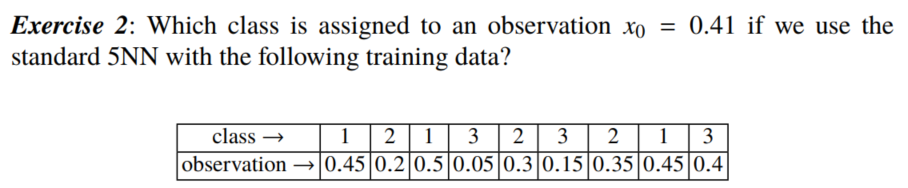

- d = [**0.04**, 0.21, **0.09**, 0.36, 0.11, 0.26, **0.06**, **0.04**, **0.01**]
- class = [1, 1, 2, 1, 3]
- Answer: class 1

### Exercise 3

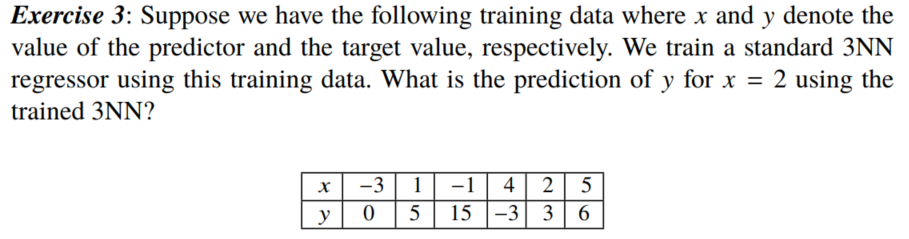

$\hat{y} = \frac{1}{k} \sum_{i=1}^{k}{y_{(i)}(x)}$

- d = [5, **1**, 3, **2**, **0**, 3]
- $\hat{y} = \frac{5-3+3}{3} = 1.66$
- Answer: 1.66

### Exercise 4

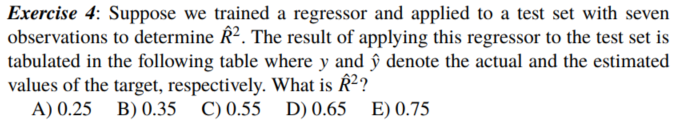
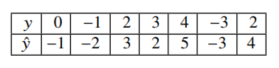

$RSS = \sum_{i=1}^{m}{(y_i - \hat{y}_i)^2} = 1+1+1+1+1+0+4=9$

$\bar{y} = \frac{0-1+2+3+4-3+2}{7}=1$

$TSS = \sum_{i=1}^{m}{(y_i - \bar{y})^2} = 1+4+1+4+9+16+1=36$

$\hat{R}^2 = 1 - \frac{RSS}{TSS} = 0.75$

### Exercise 7

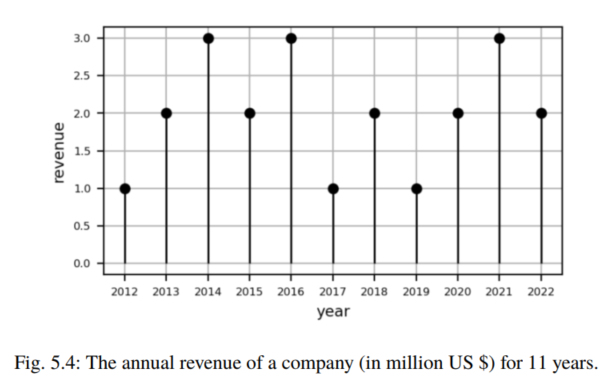

We would like to train a 2NN to forecast revenue one year in the future based on the revenue in the last three years.

In [24]:
# feature size: sliding window of 3
X = np.array([[1, 2, 3], [2, 3, 2], [3, 2, 3], [2, 3, 1], [3, 1, 2], [1, 2, 1], [2, 1, 2], [1, 2, 3]])
# target year 2015 ~ 2022
y = np.array([2, 3, 1, 2, 1, 2, 3, 2])

print(X.shape, y.shape)

(8, 3) (8,)


In [33]:
knn = KNN(n_neighbors=2)
knn.fit(X, y)
y_2023 = knn.predict([[1,2,3]])